In [27]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 


df = pd.read_csv('simple_data.csv')

display(df.head())

,player_id,level,attempt,time_to_complete,deaths,shots_fired,shots_hit,heals_used,distance_travelled
0,P1,1,1,108,0,44,35,0,140.0
1,P7,1,1,82,2,64,24,1,170.0
2,P3,2,1,129,1,52,42,1,166.0
3,P9,1,1,76,1,60,23,0,165.0
4,P5,3,1,146,1,55,45,1,181.0


In [28]:
df.isnull().sum()

player_id             0
level                 0
attempt               0
time_to_complete      0
deaths                0
shots_fired           0
shots_hit             0
heals_used            0
distance_travelled    1
dtype: int64

In [29]:

df.groupby("player_id")[["deaths","time_to_complete","shots_hit","shots_fired"]].mean().round(2)


,deaths,time_to_complete,shots_hit,shots_fired
player_id,,,,
P1,1.00,136.83,43.50,53.67
P10,3.17,92.83,29.50,77.33
P2,2.67,88.67,27.67,73.50
P3,1.17,143.17,45.83,56.17
P4,1.17,142.33,46.33,56.50
P5,1.00,145.50,45.17,55.00
P6,0.80,135.00,43.80,53.20
P7,3.60,96.00,30.20,80.40
P8,3.33,92.33,28.50,76.33


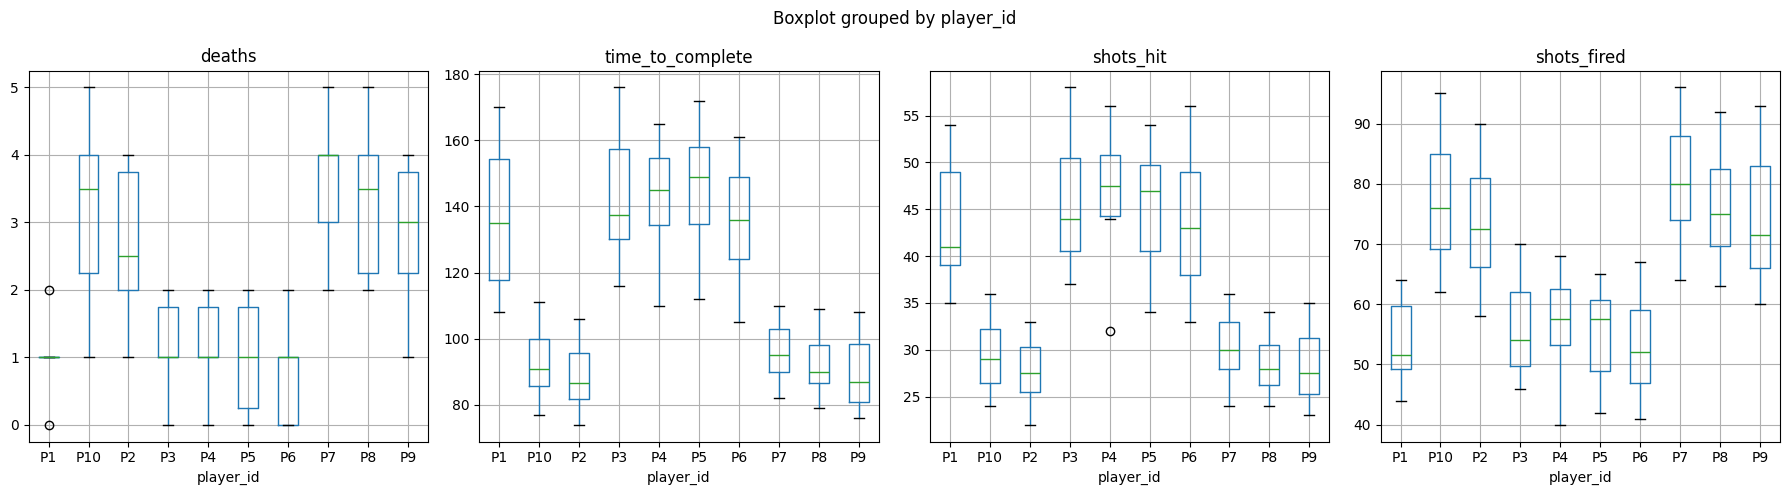

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

df.boxplot(by="player_id", column="deaths", ax=axes[0])
df.boxplot(by="player_id", column="time_to_complete", ax=axes[1])
df.boxplot(by="player_id", column="shots_hit", ax=axes[2])
df.boxplot(by="player_id", column="shots_fired", ax=axes[3])
plt.tight_layout()
plt.show()

In [31]:
df["accuracy"] = df["shots_hit"] / df["shots_fired"]

df.groupby("player_id")[["accuracy"]].mean().round(2)

,accuracy
player_id,
P1,0.81
P10,0.38
P2,0.38
P3,0.82
P4,0.82
P5,0.82
P6,0.82
P7,0.38
P8,0.37


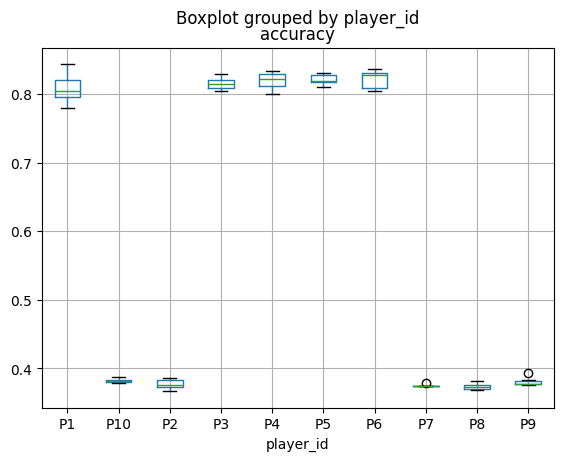

In [33]:
df.boxplot(by="player_id", column="accuracy")
plt.show()

### Analysis
Based on the results, there appear to be two distinct groups of players. The first group has higher accuracy, takes longer to complete the task, and generally has fewer deaths. The second group has lower accuracy, completes the task faster, and tends to have more deaths.

Possibility 1: There are two different skill levels in the dataset. The higher accuracy players are likely more experienced, which allows them to perform better, miss fewer shots, and survive longer, even if they take more time. The lower accuracy players are likely less experienced, which results in more missed shots, more deaths, and overall worse performance.

Possibility 2: There are two different play styles. One group plays more carefully, taking extra time to aim and avoid mistakes, which leads to higher accuracy and better results. The other group plays faster and less carefully, which allows them to finish quicker but leads to lower accuracy and more deaths.
